<h1><center>G2M Cab investment</center></h1>

In [1]:
#All initial imports
import pandas as pd
import io
import requests
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

Let's import all the tables provided.

In [2]:
cab_data=pd.read_csv("https://raw.githubusercontent.com/DataGlacier/DataSets/main/Cab_Data.csv")
city_data=pd.read_csv("https://raw.githubusercontent.com/DataGlacier/DataSets/main/City.csv")
customer_data=pd.read_csv("https://raw.githubusercontent.com/DataGlacier/DataSets/main/Customer_ID.csv")
transaction_data=pd.read_csv("https://raw.githubusercontent.com/DataGlacier/DataSets/main/Transaction_ID.csv")

We will check, what's in these tables.

In [8]:
cab_data

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760
...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480


In [119]:
city_data

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


In [5]:
customer_data

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536
...,...,...,...,...
49166,12490,Male,33,18713
49167,14971,Male,30,15346
49168,41414,Male,38,3960
49169,41677,Male,23,19454


In [6]:
transaction_data

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card
...,...,...,...
440093,10440104,53286,Cash
440094,10440105,52265,Cash
440095,10440106,52175,Card
440096,10440107,52917,Card


<h2>Pre-processing:</h2>
    
As the first step to pre-processing, we would have to change the date of travel from excel format to date format. 31/01/2016 to 31/12/2018.

In [10]:
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [16]:
cab_data['Date of Travel'] = pd.to_datetime(cab_data['Date of Travel'], unit='d', origin='1899-12-30')


In [17]:
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776


As the requirement says the data to be considered from 31/01/2016 to 31/12/2018, we will filter the required data now.

In [18]:
cab_data = cab_data[cab_data["Date of Travel"].isin(pd.date_range("2016-01-31", "2018-12-31"))]

In [20]:
cab_data.count() #shows we have 355032 records now in cab_data.

Transaction ID    355032
Date of Travel    355032
Company           355032
City              355032
KM Travelled      355032
Price Charged     355032
Cost of Trip      355032
dtype: int64

In [21]:
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
3303,10004263,2016-02-02,Pink Cab,ATLANTA GA,25.07,355.29,285.798
3311,10004271,2016-02-01,Pink Cab,BOSTON MA,38.61,358.05,405.405
3321,10004281,2016-01-31,Pink Cab,CHICAGO IL,30.69,406.90,349.866
3343,10004303,2016-02-01,Pink Cab,CHICAGO IL,25.68,347.96,264.504
3345,10004305,2016-01-31,Pink Cab,CHICAGO IL,28.00,416.11,327.600


In [22]:
cab_data['Cost of Trip']=cab_data['Cost of Trip'].round(2) #round off to 2-decimal point.

We will introduce 2 new derived columns here to calculate the amount of the trip profit and the ratio.

In [23]:
cab_data["Trip_Profit_Amount"] = cab_data["Price Charged"] - cab_data["Cost of Trip"]

In [30]:
cab_data["Trip_Profit_Ratio"] = cab_data["Trip_Profit_Amount"]/cab_data["Cost of Trip"]*100

In [31]:
cab_data

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Trip_Profit_Amount,Trip_Profit_Ratio
3303,10004263,2016-02-02,Pink Cab,ATLANTA GA,25.07,355.29,285.80,69.49,24.314206
3311,10004271,2016-02-01,Pink Cab,BOSTON MA,38.61,358.05,405.40,-47.35,-11.679822
3321,10004281,2016-01-31,Pink Cab,CHICAGO IL,30.69,406.90,349.87,57.03,16.300340
3343,10004303,2016-02-01,Pink Cab,CHICAGO IL,25.68,347.96,264.50,83.46,31.553875
3345,10004305,2016-01-31,Pink Cab,CHICAGO IL,28.00,416.11,327.60,88.51,27.017705
...,...,...,...,...,...,...,...,...,...
359387,10440101,2018-01-08,Yellow Cab,WASHINGTON DC,4.80,69.24,63.36,5.88,9.280303
359388,10440104,2018-01-04,Yellow Cab,WASHINGTON DC,8.40,113.75,106.85,6.90,6.457651
359389,10440105,2018-01-05,Yellow Cab,WASHINGTON DC,27.75,437.07,349.65,87.42,25.002145
359390,10440106,2018-01-05,Yellow Cab,WASHINGTON DC,8.80,146.19,114.05,32.14,28.180623


In [33]:
cab_data["Trip_Profit_Ratio"] = cab_data["Trip_Profit_Ratio"].round(2)
cab_data

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Trip_Profit_Amount,Trip_Profit_Ratio
3303,10004263,2016-02-02,Pink Cab,ATLANTA GA,25.07,355.29,285.80,69.49,24.31
3311,10004271,2016-02-01,Pink Cab,BOSTON MA,38.61,358.05,405.40,-47.35,-11.68
3321,10004281,2016-01-31,Pink Cab,CHICAGO IL,30.69,406.90,349.87,57.03,16.30
3343,10004303,2016-02-01,Pink Cab,CHICAGO IL,25.68,347.96,264.50,83.46,31.55
3345,10004305,2016-01-31,Pink Cab,CHICAGO IL,28.00,416.11,327.60,88.51,27.02
...,...,...,...,...,...,...,...,...,...
359387,10440101,2018-01-08,Yellow Cab,WASHINGTON DC,4.80,69.24,63.36,5.88,9.28
359388,10440104,2018-01-04,Yellow Cab,WASHINGTON DC,8.40,113.75,106.85,6.90,6.46
359389,10440105,2018-01-05,Yellow Cab,WASHINGTON DC,27.75,437.07,349.65,87.42,25.00
359390,10440106,2018-01-05,Yellow Cab,WASHINGTON DC,8.80,146.19,114.05,32.14,28.18


Also, we need to check the trips based on the year and month. So, we will derive those new features from Date of Travel. This will help us understand the seasonality in the data.

In [36]:
# We will separate the year and month in order to find some seasonality in the data.
cab_data['Year'] = cab_data["Date of Travel"].dt.year
cab_data['Month'] = cab_data["Date of Travel"].dt.month
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Trip_Profit_Amount,Trip_Profit_Ratio,Year,Month
3303,10004263,2016-02-02,Pink Cab,ATLANTA GA,25.07,355.29,285.80,69.49,24.31,2016,2
3311,10004271,2016-02-01,Pink Cab,BOSTON MA,38.61,358.05,405.40,-47.35,-11.68,2016,2
3321,10004281,2016-01-31,Pink Cab,CHICAGO IL,30.69,406.90,349.87,57.03,16.30,2016,1
3343,10004303,2016-02-01,Pink Cab,CHICAGO IL,25.68,347.96,264.50,83.46,31.55,2016,2
3345,10004305,2016-01-31,Pink Cab,CHICAGO IL,28.00,416.11,327.60,88.51,27.02,2016,1


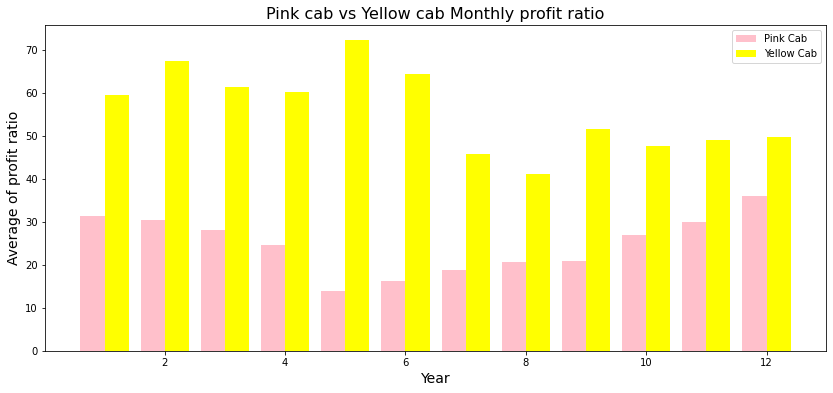

In [46]:
#General Profit ratio monthly Yellow vs Pink Cab
import numpy as np  
import matplotlib.pyplot as plt  
  
plot1 = cab_data[cab_data.Company=='Pink Cab'].groupby('Month').Trip_Profit_Ratio.mean()
plot2 = cab_data[cab_data.Company=='Yellow Cab'].groupby('Month').Trip_Profit_Ratio.mean()
plt.figure(figsize=(14,6))
ax = plt.subplot(111)
ax.bar(plot1.index-0.2, plot1.values, width=0.4, color='pink', align='center',label='Pink Cab')
ax.bar(plot1.index+0.2, plot2.values, width=0.4, color='yellow', align='center',label='Yellow Cab')
plt.title("Pink cab vs Yellow cab Monthly profit ratio",fontsize = 16)
plt.ylabel('Average of profit ratio',fontsize = 14)
plt.xlabel('Year',fontsize = 14)
plt.legend()
plt.show()

<b><i>It is very evident from the above graph that if we look at the profit % based on the cost of the trip, Yellow cab farm is more profitable everymonth than the Pink Cab farm. </i></b>

<h3><i>Master table creation combining all four tables.</i></h3>

In [49]:
MasterTable = cab_data.merge(transaction_data, on = 'Transaction ID').merge(customer_data, on ='Customer ID').merge(city_data, on ='City')
MasterTable

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Trip_Profit_Amount,Trip_Profit_Ratio,Year,Month,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10004263,2016-02-02,Pink Cab,ATLANTA GA,25.07,355.29,285.80,69.49,24.31,2016,2,29170,Cash,Male,40,11777,"814,885","24,701"
1,10049443,2016-07-04,Pink Cab,ATLANTA GA,19.72,203.13,228.75,-25.62,-11.20,2016,7,29170,Cash,Male,40,11777,"814,885","24,701"
2,10197301,2017-07-21,Yellow Cab,ATLANTA GA,3.60,90.89,48.82,42.07,86.17,2017,7,29170,Card,Male,40,11777,"814,885","24,701"
3,10391854,2018-10-20,Pink Cab,ATLANTA GA,36.63,495.41,435.90,59.51,13.65,2018,10,29170,Cash,Male,40,11777,"814,885","24,701"
4,10004551,2016-01-31,Yellow Cab,ATLANTA GA,17.34,336.95,224.73,112.22,49.94,2016,1,29107,Card,Female,30,19129,"814,885","24,701"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355027,10437174,2018-01-07,Pink Cab,PHOENIX AZ,17.40,257.37,208.80,48.57,23.26,2018,1,21371,Card,Female,26,3918,"943,999","6,133"
355028,10439396,2018-01-01,Yellow Cab,PHOENIX AZ,38.00,703.50,487.92,215.58,44.18,2018,1,23933,Card,Male,27,2271,"943,999","6,133"
355029,10439398,2018-01-09,Yellow Cab,PHOENIX AZ,24.42,447.95,348.72,99.23,28.46,2018,1,22142,Card,Female,39,13208,"943,999","6,133"
355030,10439405,2018-01-04,Yellow Cab,PHOENIX AZ,19.76,338.97,253.72,85.25,33.60,2018,1,21509,Card,Female,20,19565,"943,999","6,133"


<h3><i>More pre-processing</i></h3>

In [53]:
for column in MasterTable.columns:
    if ' ' in column:
        MasterTable = MasterTable.rename(columns={column:column.replace(' ','_')})#rename columns
for column in ["Company", "City" , "Payment_Mode" , "Gender" ] :
    MasterTable[column] = MasterTable[column].astype('category')#change data type
for column in ["Population","Users"] :
    MasterTable[column] = MasterTable[column].str.replace(',','')#remove commas
for column in ["Population", "Users"] :
    MasterTable[column] = MasterTable[column].astype('int64') #change data type
MasterTable.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 355032 entries, 0 to 355031
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction_ID      355032 non-null  int64         
 1   Date_of_Travel      355032 non-null  datetime64[ns]
 2   Company             355032 non-null  category      
 3   City                355032 non-null  category      
 4   KM_Travelled        355032 non-null  float64       
 5   Price_Charged       355032 non-null  float64       
 6   Cost_of_Trip        355032 non-null  float64       
 7   Trip_Profit_Amount  355032 non-null  float64       
 8   Trip_Profit_Ratio   355032 non-null  float64       
 9   Year                355032 non-null  int64         
 10  Month               355032 non-null  int64         
 11  Customer_ID         355032 non-null  int64         
 12  Payment_Mode        355032 non-null  category      
 13  Gender              355032 no

In [54]:
MasterTable.head()

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Trip_Profit_Amount,Trip_Profit_Ratio,Year,Month,Customer_ID,Payment_Mode,Gender,Age,Income_(USD/Month),Population,Users
0,10004263,2016-02-02,Pink Cab,ATLANTA GA,25.07,355.29,285.80,69.49,24.31,2016,2,29170,Cash,Male,40,11777,814885,24701
1,10049443,2016-07-04,Pink Cab,ATLANTA GA,19.72,203.13,228.75,-25.62,-11.20,2016,7,29170,Cash,Male,40,11777,814885,24701
2,10197301,2017-07-21,Yellow Cab,ATLANTA GA,3.60,90.89,48.82,42.07,86.17,2017,7,29170,Card,Male,40,11777,814885,24701
3,10391854,2018-10-20,Pink Cab,ATLANTA GA,36.63,495.41,435.90,59.51,13.65,2018,10,29170,Cash,Male,40,11777,814885,24701
4,10004551,2016-01-31,Yellow Cab,ATLANTA GA,17.34,336.95,224.73,112.22,49.94,2016,1,29107,Card,Female,30,19129,814885,24701


<h3><i>Will check missing values</i></h3>

In [56]:
missing_value=0
for column in MasterTable.columns :
    missing_value += MasterTable[column].isna().sum() + MasterTable[column].isnull().sum()
print('MasterTable has {} entries , {} features and {} missing values'.format(MasterTable.shape[0] ,MasterTable.shape[1] ,missing_value))

MasterTable has 355032 entries , 18 features and 0 missing values


There are no missing values.

<h2>Outlier detection using z-score</h2>

In [61]:
import seaborn as sns

In [63]:
MasterTable.nunique()

Transaction_ID        355032
Date_of_Travel          1066
Company                    2
City                      19
KM_Travelled             874
Price_Charged          98741
Cost_of_Trip           14740
Trip_Profit_Amount    141377
Trip_Profit_Ratio      21915
Year                       3
Month                     12
Customer_ID            46020
Payment_Mode               2
Gender                     2
Age                       48
Income_(USD/Month)     22704
Population                19
Users                     19
dtype: int64

We will create 2 separate sets of data from the MasterTable into Pink Cab and Yellow Cab.

In [64]:
# MasterTable into two dataset for Pink and Yellow Cab.
Pink_cab = MasterTable [MasterTable['Company'] == 'Pink Cab'] 
Yellow_cab = MasterTable [MasterTable['Company'] == 'Yellow Cab']

In [68]:
print(len(Pink_cab))
print(len(Yellow_cab))

83825
271207


We will only analyse a few columns for outliers, as some of the columns do not require outlier analysis. For instance, gender, month, year, etc. we are aware of the values.

In [69]:
outlier_columns = ['KM_Travelled','Price_Charged','Cost_of_Trip','Age','Income_(USD/Month)','Population','Users']

In [70]:
pink_outlier = Pink_cab[outlier_columns] #new dataframe with columns selected for outlier analysis of pink cab
pink_outlier.head()

,KM_Travelled,Price_Charged,Cost_of_Trip,Age,Income_(USD/Month),Population,Users
0,25.07,355.29,285.80,40,11777,814885,24701
1,19.72,203.13,228.75,40,11777,814885,24701
3,36.63,495.41,435.90,40,11777,814885,24701
5,27.60,254.69,314.64,30,19129,814885,24701
6,36.96,581.62,425.04,30,19129,814885,24701


In [72]:
def checkZscore(cab_table,column_name):
    
    mean   = cab_table[column_name].mean()
    stn_dev = cab_table[column_name].std()
    
    upper_band = mean + 3*stn_dev
    lower_band = mean - 3*stn_dev
    
    print('\n\n' + "mean of : " + str(column_name) + " is " + str(mean) +
          '\n' + "Standard deviation of : " + str(column_name) + " is " + str(stn_dev) +
          '\n' + "Upper and Lower Limits of " + str(column_name) + " is "  + str((lower_band,upper_band))
         )
    
    return upper_band , lower_band

In [73]:
print('Outlier infos of some selected columns for Pink Cab Firm :')
for column_name in outlier_columns :
    upper_band , lower_band = checkZscore(pink_outlier , column_name)
    outliers = pink_outlier[(pink_outlier[column_name] < lower_band) | (pink_outlier[column_name] > upper_band)][column_name].values
    print('\n' + str(column_name) + " has " + str(len(outliers)) + " outliers : "    + str(outliers))
    print('\n\n**********************************************************\n')

Outlier infos of some selected columns for Pink Cab Firm :


mean of : KM_Travelled is 22.559229108261114
Standard deviation of : KM_Travelled is 12.233532061785244
Upper and Lower Limits of KM_Travelled is (-14.141367077094621, 59.25982529361685)

KM_Travelled has 0 outliers : []


**********************************************************



mean of : Price_Charged is 310.62323614673693
Standard deviation of : Price_Charged is 181.79247009061018
Upper and Lower Limits of Price_Charged is (-234.75417412509358, 856.0006464185674)

Price_Charged has 255 outliers : [ 902.65  870.48  896.35  880.62  903.42  905.8   885.4  1105.72  889.1
  880.57  910.33  954.04  856.2   858.95 1014.03  977.81  870.15  861.13
  862.29  911.85  861.25  856.79  942.39  867.5   877.99  876.05  998.15
  905.57  902.75  985.04  904.36 1069.03  992.    884.49 1133.03  932.53
 1517.15 1495.6   936.29  894.83 1368.66 1234.24  951.53 1623.48 1319.52
 1339.31 1094.02  893.57 1172.53  857.32 1055.64 1106.11 1203.14 1

<b><i>   Similarly, we will check this for Yellow cab as well</i></b>


In [91]:
yellow_outlier = Yellow_cab[outlier_columns] #new dataframe with columns selected for outlier analysis of pink cab
yellow_outlier.head()

,KM_Travelled,Price_Charged,Cost_of_Trip,Age,Income_(USD/Month),Population,Users
2,3.60,90.89,48.82,40,11777,814885,24701
4,17.34,336.95,224.73,30,19129,814885,24701
7,4.75,76.88,60.99,30,19129,814885,24701
9,28.60,554.92,391.25,48,5480,814885,24701
10,15.34,335.56,204.33,48,5480,814885,24701


In [92]:
print('Outlier infos of some selected columns for Pink Cab Firm :')
for column_name in outlier_columns :
    upper_band , lower_band = checkZscore(yellow_outlier , column_name)
    outliers = yellow_outlier[(yellow_outlier[column_name] < lower_band) | (yellow_outlier[column_name] > upper_band)][column_name].values
    print('\n' + str(column_name) + " has " + str(len(outliers)) + " outliers : "    + str(outliers))
    print('\n\n**********************************************************\n')

Outlier infos of some selected columns for Pink Cab Firm :


mean of : KM_Travelled is 22.568875139653787
Standard deviation of : KM_Travelled is 12.2344034384201
Upper and Lower Limits of KM_Travelled is (-14.134335175606513, 59.27208545491409)

KM_Travelled has 0 outliers : []


**********************************************************



mean of : Price_Charged is 457.3962675004801
Standard deviation of : Price_Charged is 287.85144974356035
Upper and Lower Limits of Price_Charged is (-406.15808173020093, 1320.950616731161)

Price_Charged has 1806 outliers : [1419.48 1543.62 1358.5  ... 1725.77 1993.83 1361.83]


**********************************************************



mean of : Cost_of_Trip is 297.91743837732065
Standard deviation of : Cost_of_Trip is 162.55622825732755
Upper and Lower Limits of Cost_of_Trip is (-189.75124639466196, 785.5861231493033)

Cost_of_Trip has 0 outliers : []


**********************************************************



mean of : Age is 35.340695483

<b><i>We came across, Price_Charged has about 255 outliers out of 83825 records for Pink Cab data.</i></b>

<b><i>And, price_charged has about 1806 outliers out of 271207 records for Yellow cab data. </i><b>

Text(0, 0.5, 'Yellow Cab')

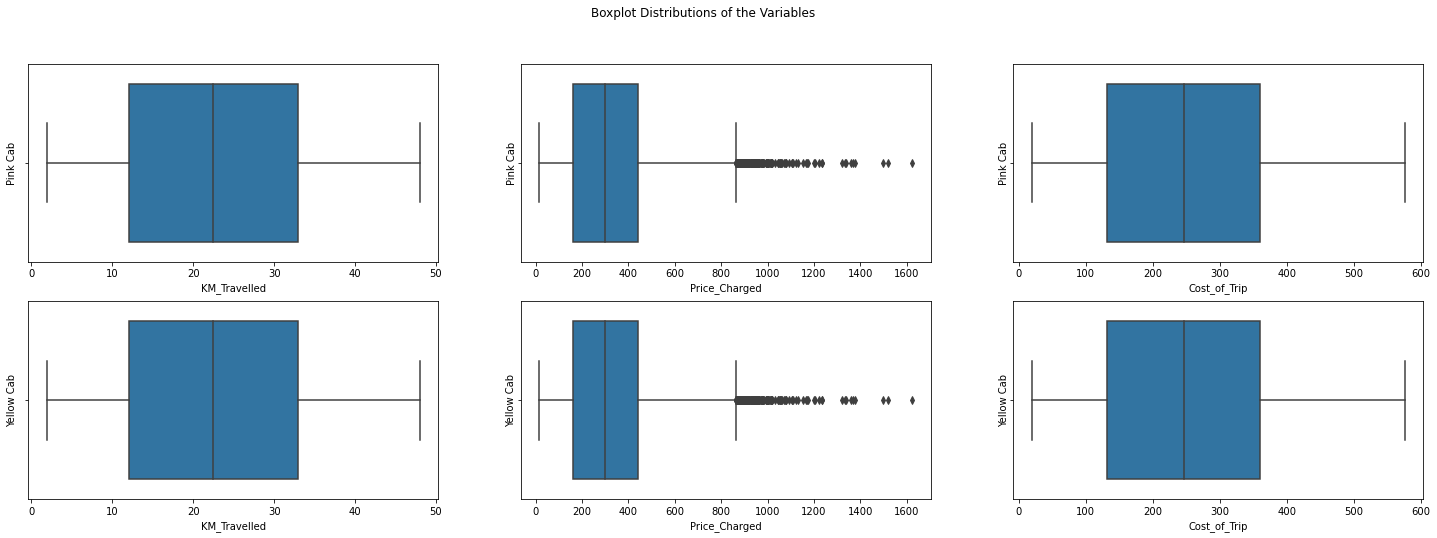

In [94]:
#Boxplot distributions of the desired variables were drawn.
fig,axes = plt.subplots(2, 3, figsize=(25, 8), sharey=True)
fig.suptitle('Boxplot Distributions of the Variables')

sns.boxplot(ax=axes[0,0], x='KM_Travelled' ,        data=Pink_cab ).set_ylabel("Pink Cab")
sns.boxplot(ax=axes[0,1], x='Price_Charged'   ,     data=Pink_cab  ) .set_ylabel("Pink Cab")
sns.boxplot(ax=axes[0,2], x='Cost_of_Trip' ,        data=Pink_cab ).set_ylabel("Pink Cab")
sns.boxplot(ax=axes[1,0], x='KM_Travelled' ,        data=Pink_cab ).set_ylabel("Yellow Cab")
sns.boxplot(ax=axes[1,1], x='Price_Charged'   ,     data=Pink_cab  ) .set_ylabel("Yellow Cab")
sns.boxplot(ax=axes[1,2], x='Cost_of_Trip' ,        data=Pink_cab ).set_ylabel("Yellow Cab")

<b><i>From the boxplot above we can see that  Price_Charged has significant amout of outliers in both Yellow and Pink cab farms.</i></b>

<b><i>For now, we are not removing the outliers.</i></b>

<h2> Hypothesis test </h2>

Let's check the correlation between the features using Pearson's correlation.

<AxesSubplot:>

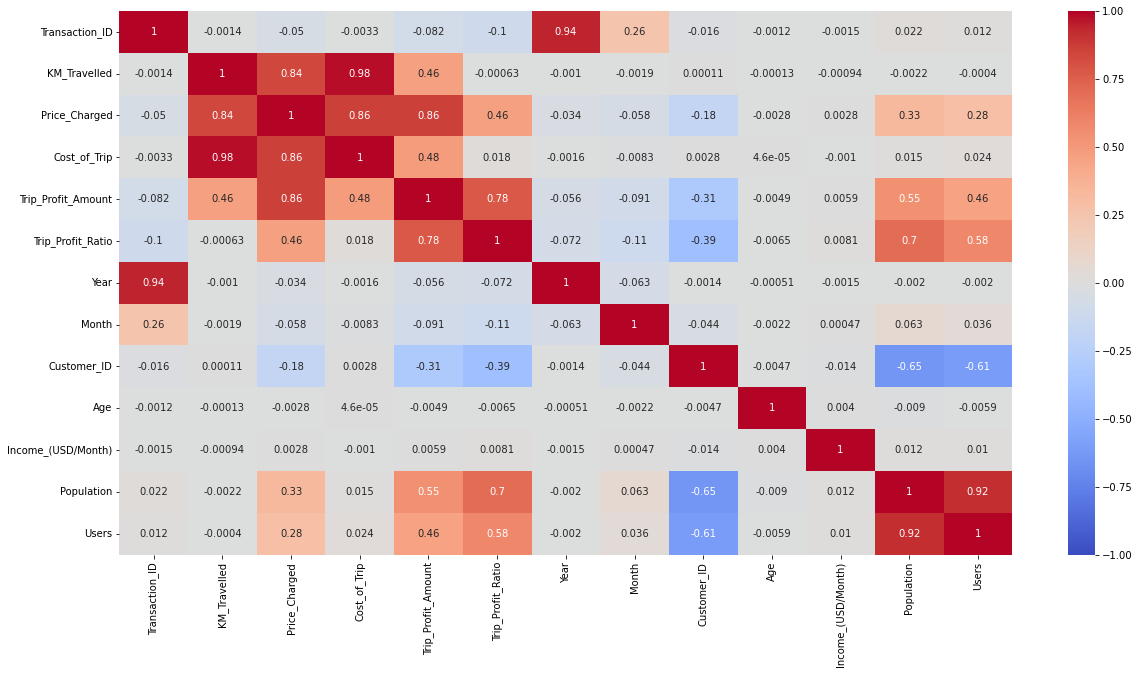

In [96]:
corrM =MasterTable.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corrM,annot=True,vmin=-1,vmax=1,cmap='coolwarm')

We can see that, KM travelled have positive correlation with price charged and cost of the trip, which is understandable. As if the the distance if more, cost of the trip would be more and so would be the price charged. It would be interesting to see, the trip profit ratio is dependent on population and users as we can see above.





In [ ]:
# Example of the Spearman's Rank Correlation Test
from scipy.stats import spearmanr
data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [0.353, 3.517, 0.125, -7.545, -0.555, -1.536, 3.350, -1.578, -3.537, -1.579]
stat, p = spearmanr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably independent')
else:
 print('Probably dependent')

Now, we We will look at some categorical variables like, gender. We will check the proportion of male and female users of both the cab services.

In [97]:
cab_gender=MasterTable.groupby(['Company','Gender']).Customer_ID.nunique()
cab_gender

Company     Gender
Pink Cab    Female    14811
            Male      17363
Yellow Cab  Female    18379
            Male      21376
Name: Customer_ID, dtype: int64

In [98]:
print(MasterTable.Gender.value_counts())

Male      201958
Female    153074
Name: Gender, dtype: int64


In [103]:
print(Pink_cab.groupby('Gender').Customer_ID.nunique())
print(Pink_cab.Customer_ID.nunique())

#Pink_cab = MasterTable [MasterTable['Company'] == 'Pink Cab'] 
#Yellow_cab = MasterTable [MasterTable['Company'] == 'Yellow Cab']

Gender
Female    14811
Male      17363
Name: Customer_ID, dtype: int64
32174


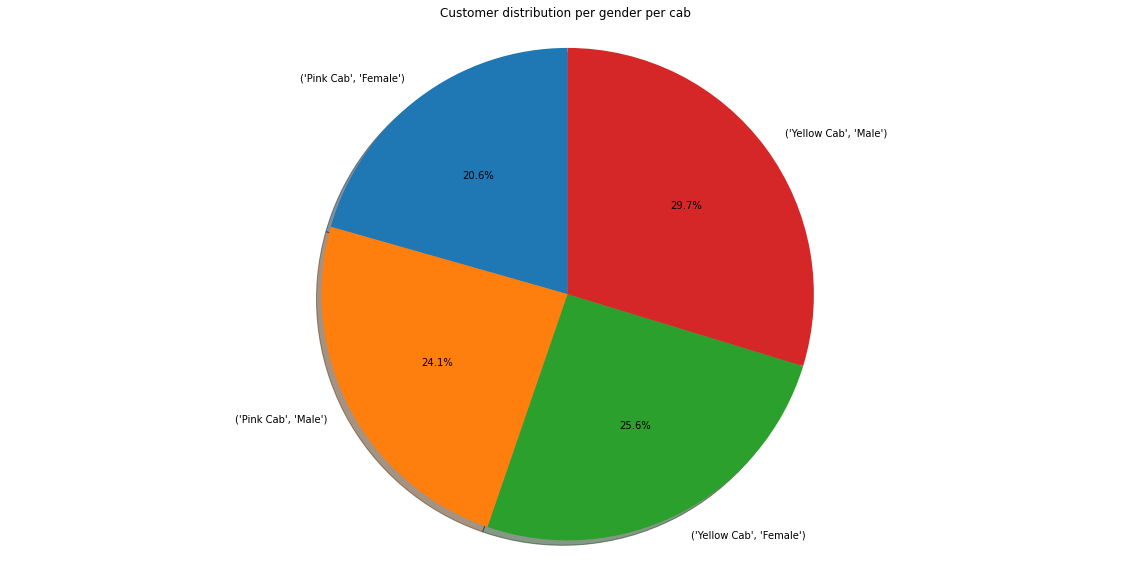

In [104]:
#We will check the distribution of customers based on gender for both the cab services
labs = cab_gender.index
vals = cab_gender.values
figp, axp = plt.subplots(figsize=(20,10))
axp.pie(vals , labels=labs, autopct='%1.1f%%',shadow=True, startangle=90,)
axp.axis('equal')

plt.title('Customer distribution per gender per cab')
plt.show()

Yellow cabs have both male and female customer base more than Pink cabs.

So, our next hypothesis would be based on gender. We will check if it effects the profit ratio.
<h2> Hypothesis 2 </h2>
<h4> Null hypothesis H0: Male and Female population will have no difference on the profit ratio.
    
Alternative hypothesis H1: Male and Female population will have difference on profit ratio.</h4>

In [118]:
#Let's test for Yellow cab first
y_female = MasterTable[(MasterTable.Gender=='Female')&(MasterTable.Company=='Yellow Cab')].groupby('Transaction_ID').Trip_Profit_Ratio.mean()
y_male = MasterTable[(MasterTable.Gender=='Male')&(MasterTable.Company=='Yellow Cab')].groupby('Transaction_ID').Trip_Profit_Ratio.mean()
print(y_female.shape[0],y_male.shape[0])

from scipy import stats
_, p_value = stats.ttest_ind(y_female.values,b=y_male.values,equal_var=True)
print('P value is ', p_value)
if(p_value<0.05):
    print('We accept alternate hypothesis that there is a statistical difference')
else:
    print('We accept null hypothesis that there is no statistical difference')
    
print('P value is ', p_value)

115634 155573
P value is  5.23237094525278e-28
We accept alternate hypothesis that there is a statistical difference
P value is  5.23237094525278e-28


In [107]:
y_female

Transaction_ID
10004551    49.94
10004562    65.19
10004577    29.00
10004594    77.77
10004622    50.71
            ...  
10440084    16.65
10440090    58.85
10440092    13.58
10440094    13.39
10440097    40.65
Name: Trip_Profit_Ratio, Length: 115634, dtype: float64

In [117]:
MasterTable.Age.value_counts()

23    12170
20    12090
27    11885
25    11835
32    11815
34    11684
22    11671
39    11650
26    11522
19    11432
40    11391
33    11313
21    11302
30    11024
28    11014
24    11000
37    10965
36    10921
31    10806
38    10781
18    10714
29    10549
35    10408
61     4317
45     4208
49     4100
50     4047
58     4046
47     4040
59     4010
42     3922
51     3885
46     3864
64     3859
41     3815
43     3786
54     3754
52     3744
60     3737
56     3696
63     3682
44     3675
48     3652
53     3596
62     3486
57     3432
55     3401
65     3336
Name: Age, dtype: int64